In [33]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

In [21]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [22]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')
partial

SEX,AGE,CENSUS2010POP,POPESTIMATE2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190
0,4,4063170,4003448
0,5,4056858,4004858
0,6,4066381,4134352
0,7,4030579,4154000
0,8,4046486,4119524
0,9,4148353,4106832


In [23]:
# Make things easier to read
# ALERT: The relabel function does not need an assignment after callin it 
# to change/overwrite the labels in the partial table above

simple = partial.relabel(2, '2010').relabel(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190
0,4,4063170,4003448
0,5,4056858,4004858
0,6,4066381,4134352
0,7,4030579,4154000
0,8,4046486,4119524
0,9,4148353,4106832


In [25]:
# Remove the row of age totals(999)

no_999 = simple.where('AGE', are.below(999))
no_999

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190
0,4,4063170,4003448
0,5,4056858,4004858
0,6,4066381,4134352
0,7,4030579,4154000
0,8,4046486,4119524
0,9,4148353,4106832


In [27]:
# Remove male and female (keep only combined where SEX = 0)
everyone = no_999.where('SEX', 0).drop('SEX')

everyone

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


## Line Plots ##

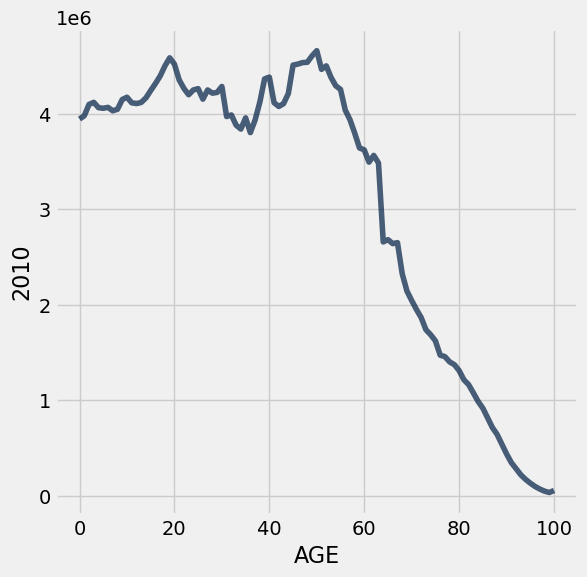

In [28]:
# Create a line plot having the variable AGE on the horizontal x-axis and POPULATION IN 2010 on the vertical y-axis.

everyone.plot('AGE', '2010')

## That plot should be labeled! Here are 3 ways to label it:

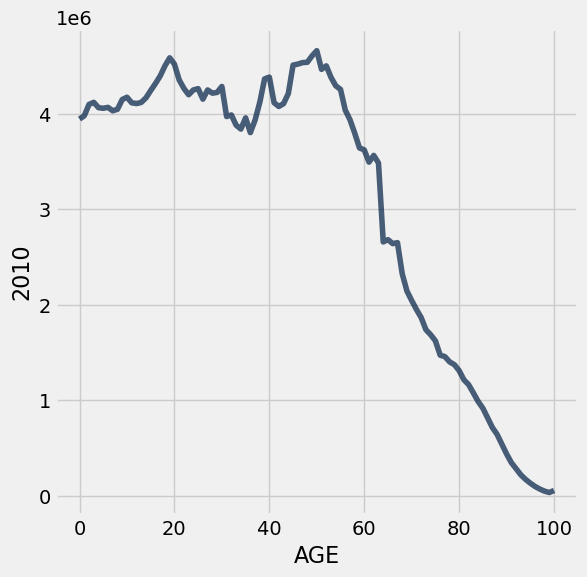

In [29]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2010')

US Population


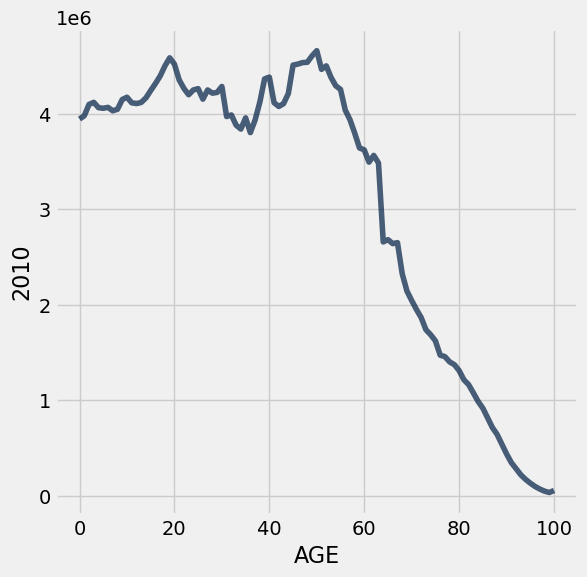

In [30]:
everyone.plot('AGE', '2010')
print('US Population')  # <--- Print out what it is

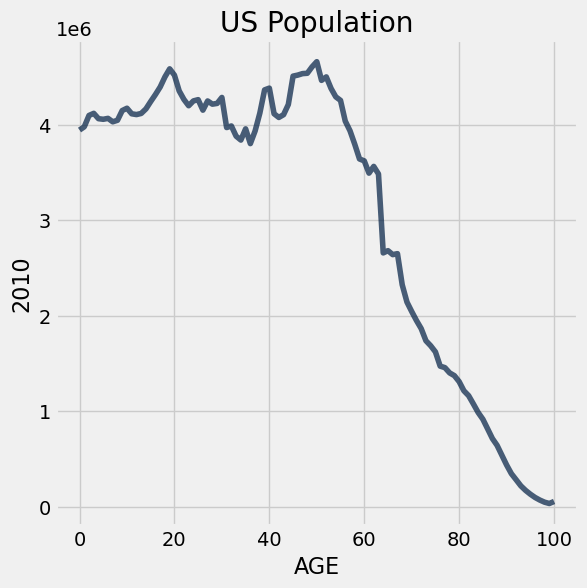

In [36]:
everyone.plot('AGE', '2010')
plot.title('US Population'); # Show the title on the plot. I prefer this!

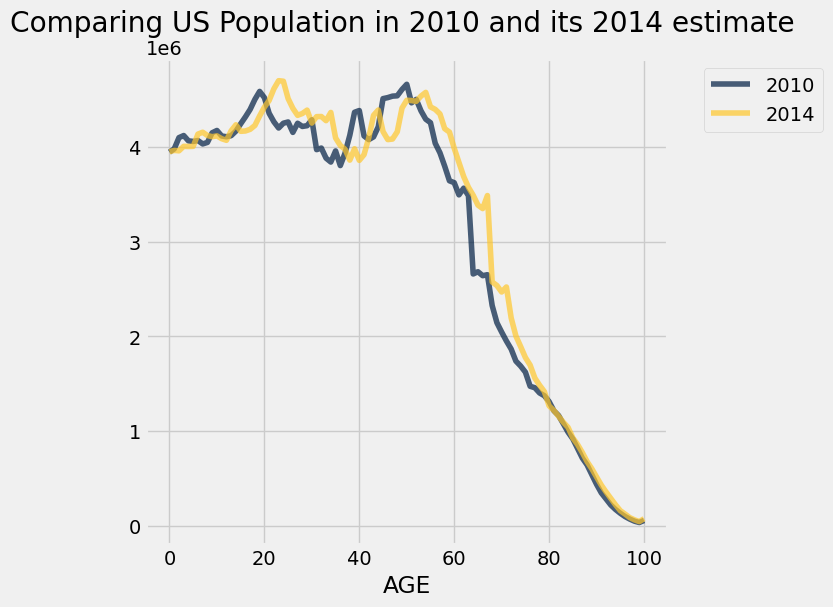

In [35]:
# Age distribution for two different years 2010 and 2014

everyone.plot('AGE') #Use this if the table has just the three columns.
plot.title('Comparing US Population in 2010 and its 2014 estimate '); 

**Quesion** What proportion of each age group were female in 2010?

In [39]:
uspop_mf_2010 = no_999.select('AGE','2010', 'SEX').where('SEX', are.above(0))
uspop_mf_2010

AGE,2010,SEX
0,2014276,1
1,2030853,1
2,2092198,1
3,2104550,1
4,2077550,1
5,2072094,1
6,2075319,1
7,2057076,1
8,2065453,1
9,2119696,1


In [40]:
females_uspop_2010 = uspop_mf_2010.where('SEX', are.equal_to(2)).drop('SEX').relabeled(1, 'females_2010')
males_uspop_2010 = uspop_mf_2010.where('SEX', are.equal_to(1)).drop('SEX').relabeled(1, 'males_2010')
females_uspop_2010.show(5)
males_uspop_2010.show(5)

AGE,females_2010
0,1929877
1,1947217
2,2004731
3,2014490
4,1985620


AGE,males_2010
0,2014276
1,2030853
2,2092198
3,2104550
4,2077550


In [41]:
# Let's combine all columns into a single table

combined_table = Table().with_columns('age_group', females_uspop_2010.column('AGE'),
                                     'female_pop', females_uspop_2010.column('females_2010'),
                                     'male_pop', males_uspop_2010.column('males_2010'))

combined_table

age_group,female_pop,male_pop
0,1929877,2014276
1,1947217,2030853
2,2004731,2092198
3,2014490,2104550
4,1985620,2077550
5,1984764,2072094
6,1991062,2075319
7,1973503,2057076
8,1981033,2065453
9,2028657,2119696


In [42]:
# Generate the required proportions

combined_table.column('female_pop') / (combined_table.column('female_pop') + combined_table.column('male_pop'))

array([ 0.48930074,  0.48948787,  0.4893253 ,  0.48906784,  0.4886874 ,
        0.48923674,  0.48963981,  0.48963263,  0.48956873,  0.48902709,
        0.48808268,  0.48880606,  0.48854829,  0.48885203,  0.48738545,
        0.48689268,  0.48657029,  0.48509645,  0.48776999,  0.48923348,
        0.48921153,  0.489424  ,  0.4893365 ,  0.49011247,  0.49073238,
        0.49293043,  0.4949581 ,  0.49618334,  0.49739505,  0.49848428,
        0.49580742,  0.49923279,  0.49973601,  0.5008278 ,  0.50088664,
        0.49931782,  0.5027481 ,  0.50351676,  0.50272206,  0.50343498,
        0.50008852,  0.50235104,  0.50230588,  0.50403461,  0.50367589,
        0.5037668 ,  0.50639381,  0.50647911,  0.5069763 ,  0.50831097,
        0.50639305,  0.50930637,  0.50959309,  0.5111459 ,  0.51221936,
        0.51266397,  0.51550843,  0.51596337,  0.51651046,  0.51833523,
        0.51796635,  0.51924672,  0.51933637,  0.51998143,  0.52283309,
        0.5250192 ,  0.52701428,  0.52860176,  0.53207854,  0.53

In [43]:
# Join the column of proportions to the last game above.

prop_female_uspop_2010 =  combined_table.with_column('Proportion Female', 
                                            females_uspop_2010.column('females_2010') / 
                                              (females_uspop_2010.column('females_2010') + males_uspop_2010.column('males_2010')))
prop_female_uspop_2010

age_group,female_pop,male_pop,Proportion Female
0,1929877,2014276,0.489301
1,1947217,2030853,0.489488
2,2004731,2092198,0.489325
3,2014490,2104550,0.489068
4,1985620,2077550,0.488687
5,1984764,2072094,0.489237
6,1991062,2075319,0.48964
7,1973503,2057076,0.489633
8,1981033,2065453,0.489569
9,2028657,2119696,0.489027


**Quesion** Provide a line plot of the `Proportion Female` in each age group against `Age`

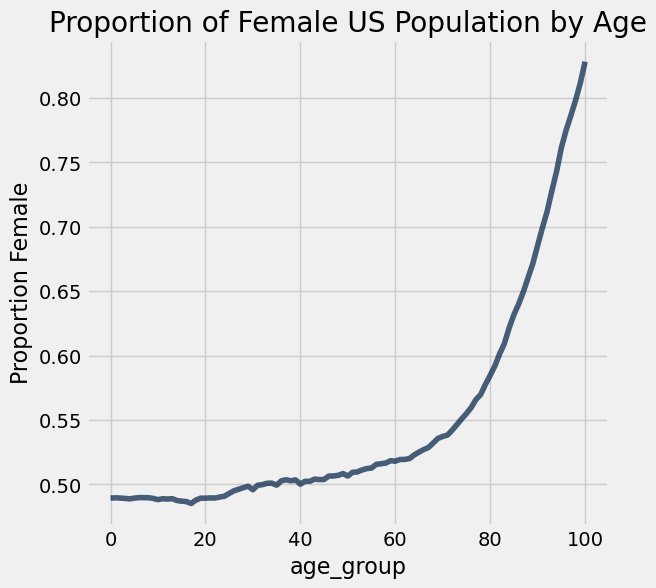

In [44]:
prop_female_uspop_2010.plot('age_group', 'Proportion Female')
plot.title('Proportion of Female US Population by Age');

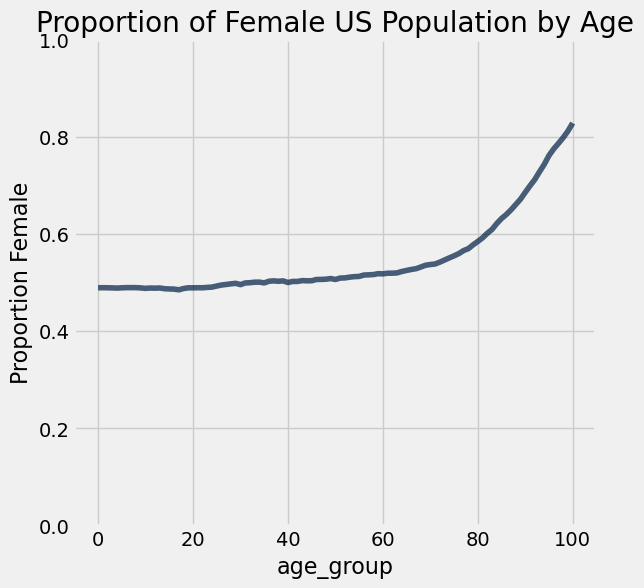

In [46]:
# It is possible to control the limits of values on the y- and x-axis. Let's see an example.

prop_female_uspop_2010.plot('age_group', 'Proportion Female')
plots.title('Proportion of Female US Population by Age');
plots.ylim(0, 1);

When are line plots appropriate for use in visualizations?

- Line graphs are appropriate only when both the $x$ and $y$-axes display ordered variables.
- They are often used to study chronological trends and patterns.

## More on Visualizations ##

In [51]:
# Load in a new data set to illustrate basic visualization tools.

insurance = Table.read_table('insurance_charges.csv')
insurance

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


## Histograms ##

- A histogram is a chart that plots the distribution of ONE numeric variable’s values as a series of bars. 
- Each bar typically covers a range of numeric values called a `bin` or `class`
- A bar’s height indicates the frequency of data points with a value within the corresponding bin.
- We shalll learn more about histograms in the next class. 

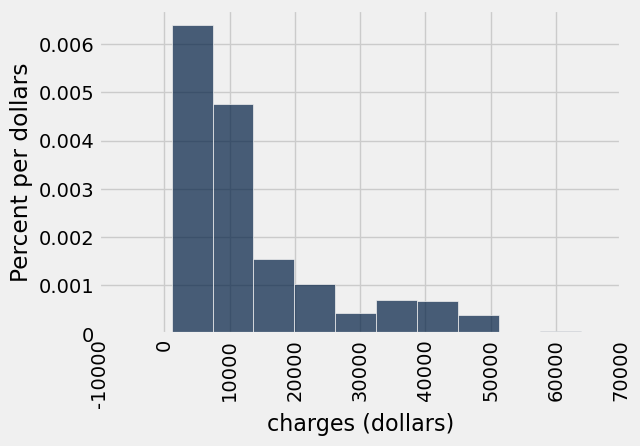

In [53]:
insurance.hist('charges', unit="dollars")

The next class is devoted to the study of histograms in further details - 

We shall focus on what aspects of a histogram that should be higlighted when unraveling its structure and layout. 

## Scatter Plots ##

- To investigate the possibility of a relationship between TWO numerical variables, the appropriate visualization is a SCATTER PLOT. 

**Question:** Produce a scatterplot of `Charges` against `Age` of each insurance policy member in the data set.

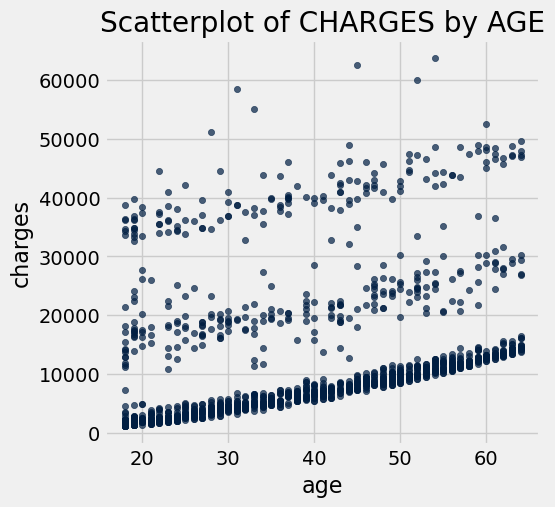

In [59]:
insurance.scatter('age', 'charges')
plot.title('Scatterplot of CHARGES by AGE');

**Question:** Produce a scatterplot of `Charges` against `bmi` of each insurance policy member in the data set.

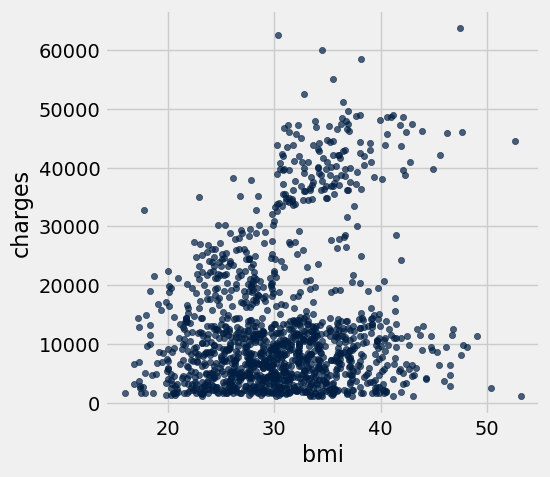

In [60]:
insurance.scatter('bmi', 'charges')

**Question:** Does it appear that the plot above has separable points(more like the points can be grouped into two major clusters)? If so, can you provide a scatterplot of `Charges` against `bmi` of each insurance policy member in the data set, with a grouping based on a categorical variable?

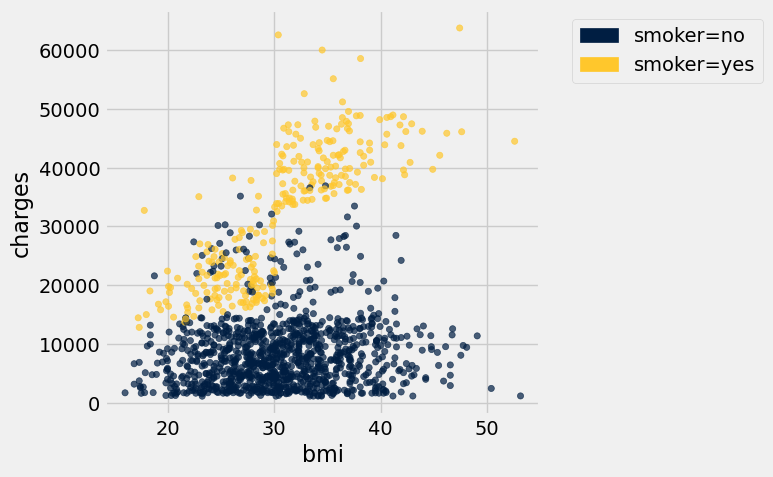

In [62]:
insurance.scatter('bmi', 'charges', group = 'smoker')

**Question:** What does the scatterplot above tell you? 

## Bar Charts ##

The bar chart is a familiar way of visualizing categorical distributions. 

- It displays a bar for each category. The bars are equally spaced and equally wide. 
- The length of each bar is proportional to the frequency of the corresponding category.
- We will draw bar charts with horizontal bars because it’s easier to label the bars that way. 
- The Table method fro drawing a horizontal bar chart is therefore called `barh`.
- It takes two arguments: the first is the column label of the categories, and the second is the column label of the frequencies.

In [65]:
vgsales = Table.read_table('vgsales.csv')
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [69]:
# One way to use the barh() function CORRECTLY.

icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


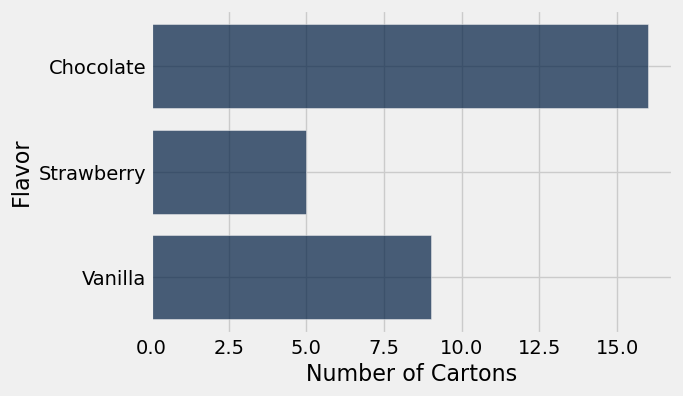

In [73]:
# Only to be used if you have one column of the categorical variable and its respective counts in the Table(Frequency Distribution).
icecream.barh('Flavor') 

**Question:** What are the top ten games that sold the most in North America(`NA_Sales`)? 

In [71]:
top10_NA_Sales = vgsales.sort('NA_Sales', descending=True).take(np.arange(10))
top10_NA_Sales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


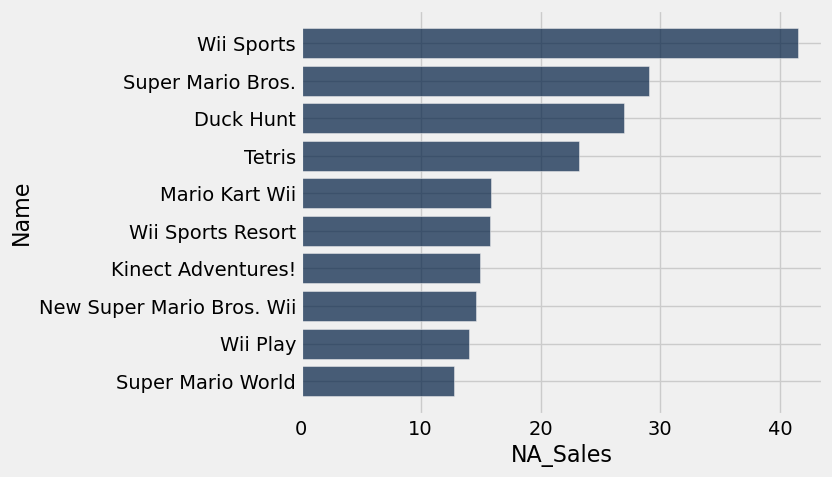

In [72]:
# Another way to use the barh() function CORRECTLY.
# It takes two arguments: the first is the column label of the categories, 
# and the second is the column label of the frequencies.

top10_NA_Sales.barh('Name', 'NA_Sales')

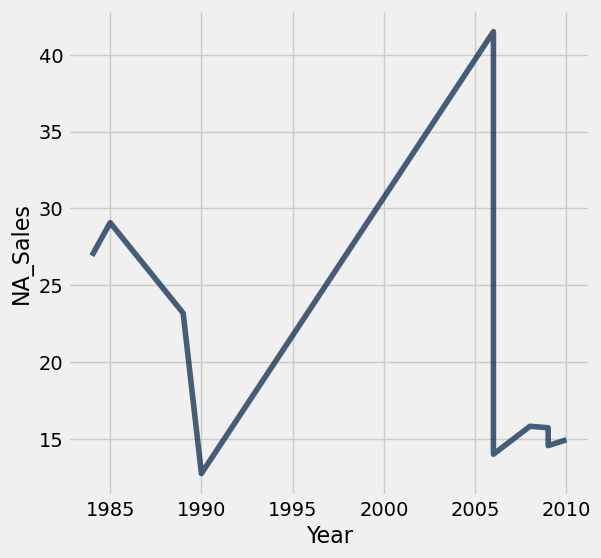

In [74]:
# A line plot doesn't make sense here: don't do this to answer the question above! But why?
# We want to show top ten sales for a particular region, not over some ordered time in years.

top10_NA_Sales.plot('Year', 'NA_Sales')

In [81]:
top10_NA_Sales.select('Platform', 'NA_Sales', 'JP_Sales', 'Other_Sales').group('Platform')

Platform,count
GB,1
NES,2
SNES,1
Wii,5
X360,1
